In [16]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Diccionario de datos
Gender {Male, Female} = {1, 0}
family {yes, no} = {1, 0}
favc {yes, no} = {1, 0}
CAEC {Sometimes, Frequently, Always, no} = {1, 2, 3, 0}
smoke {yes, no} = {1, 0}
scc {yes, no} = {1, 0}
CALC {Sometimes, Frequently, no} = {1, 2, 0}
MTRANS {'Public_Transportation', 'Automobile', 'Walking', 'Motorbike', 'Bike'} = {1, 4, 0, 3, 2}
Obesity ['Obesity_Type_III', 'Obesity_Type_II', 'Normal_Weight',
       'Obesity_Type_I', 'Insufficient_Weight', 'Overweight_Level_II',
       'Overweight_Level_I'] = [6, 5, 1, 4, 0, 3, 2]


In [17]:
df = pd.read_csv('./train.csv')
df['FCVC'] = df['FCVC'].astype(int)
df['NCP'] = df['NCP'].astype(int)
df['CH2O'] = df['CH2O'].astype(int)
df['FAF'] = df['FAF'].astype(int)
df['TUE'] = df['TUE'].astype(int)
df

id  Gender        Age    Height      Weight  \
0          0    Male  24.443011  1.699998   81.669950   
1          1  Female  18.000000  1.560000   57.000000   
2          2  Female  18.000000  1.711460   50.165754   
3          3  Female  20.952737  1.710730  131.274851   
4          4    Male  31.641081  1.914186   93.798055   
...      ...     ...        ...       ...         ...   
20753  20753    Male  25.137087  1.766626  114.187096   
20754  20754    Male  18.000000  1.710000   50.000000   
20755  20755    Male  20.101026  1.819557  105.580491   
20756  20756    Male  33.852953  1.700000   83.520113   
20757  20757    Male  26.680376  1.816547  118.134898   

      family_history_with_overweight FAVC  FCVC  NCP        CAEC SMOKE  CH2O  \
0                                yes  yes     2    2   Sometimes    no     2   
1                                yes  yes     2    3  Frequently    no     2   
2                                yes  yes     1    1   Sometimes    no     1   
3                                yes  yes     3    3   Sometimes    no     1   
4                                yes  yes     2    1   Sometimes    no     1   
...                              ...  ...   ...  ...         ...   ...   ...   
20753                            yes  yes     2    3   Sometimes    no     2   
20754                             no  yes     3    4  Frequently    no     1   
20755                            yes  yes     2    3   Sometimes    no     2   
20756                            yes  yes     2    1   Sometimes    no     2   
20757                            yes  yes     3    3   Sometimes    no     2   

      SCC  FAF  TUE       CALC                 MTRANS           NObeyesdad  
0      no    0    0  Sometimes  Public_Transportation  Overweight_Level_II  
1      no    1    1         no             Automobile        Normal_Weight  
2      no    0    1         no  Public_Transportation  Insufficient_Weight  
3      no    1    0  Sometimes  Public_Transportation     Obesity_Type_III  
4      no    1    0  Sometimes  Public_Transportation  Overweight_Level_II  
...    ..  ...  ...        ...                    ...                  ...  
20753  no    1    0  Sometimes  Public_Transportation      Obesity_Type_II  
20754  no    2    1  Sometimes  Public_Transportation  Insufficient_Weight  
20755  no    1    1         no  Public_Transportation      Obesity_Type_II  
20756  no    0    0         no             Automobile  Overweight_Level_II  
20757  no    0    0  Sometimes  Public_Transportation      Obesity_Type_II  

[20758 rows x 18 columns]

In [18]:
df.describe()

id           Age        Height        Weight          FCVC  \
count  20758.00000  20758.000000  20758.000000  20758.000000  20758.000000   
mean   10378.50000     23.841804      1.700245     87.887768      2.301041   
std     5992.46278      5.688072      0.087312     26.379443      0.588376   
min        0.00000     14.000000      1.450000     39.000000      1.000000   
25%     5189.25000     20.000000      1.631856     66.000000      2.000000   
50%    10378.50000     22.815416      1.700000     84.064875      2.000000   
75%    15567.75000     26.000000      1.762887    111.600553      3.000000   
max    20757.00000     61.000000      1.975663    165.057269      3.000000   

                NCP          CH2O           FAF           TUE  
count  20758.000000  20758.000000  20758.000000  20758.000000  
mean       2.663407      1.780085      0.773100      0.402062  
std        0.758286      0.568271      0.827203      0.591259  
min        1.000000      1.000000      0.000000      0.000000  
25%        3.000000      1.000000      0.000000      0.000000  
50%        3.000000      2.000000      1.000000      0.000000  
75%        3.000000      2.000000      1.000000      1.000000  
max        4.000000      3.000000      3.000000      2.000000

In [19]:
df['family_history_with_overweight'].value_counts()

family_history_with_overweight
yes    17014
no      3744
Name: count, dtype: int64

In [20]:
df['MTRANS'].value_counts().keys()

Index(['Public_Transportation', 'Automobile', 'Walking', 'Motorbike', 'Bike'], dtype='object', name='MTRANS')

In [21]:
df['NObeyesdad'].value_counts().keys()

Index(['Obesity_Type_III', 'Obesity_Type_II', 'Normal_Weight',
       'Obesity_Type_I', 'Insufficient_Weight', 'Overweight_Level_II',
       'Overweight_Level_I'],
      dtype='object', name='NObeyesdad')

In [22]:
gen = df['Gender'].map({'Male':1, 'Female':0})
fam = df['family_history_with_overweight'].map({'yes':1, 'no':0})
fav = df['FAVC'].map({'yes':1, 'no':0})
smk = df['SMOKE'].map({'yes':1, 'no':0})
scc = df['SCC'].map({'yes':1, 'no':0})
caec = df['CAEC'].map({'Sometimes':1, 'Frequently':2, 'Always':3, 'no':0})
calc = df['CALC'].map({'Sometimes':1, 'Frequently':2, 'no':0})
mtrans = df['MTRANS'].map({'Public_Transportation':1, 'Automobile':4, 'Walking':0, 'Motorbike':3, 'Bike':2})

df['Gender'] = gen 
df['family_history_with_overweight'] = fam
df['FAVC'] = fav
df['SMOKE'] = smk
df['SCC'] = scc
df['CAEC'] = caec
df['CALC'] = calc
df['MTRANS'] = mtrans
df

id  Gender        Age    Height      Weight  \
0          0       1  24.443011  1.699998   81.669950   
1          1       0  18.000000  1.560000   57.000000   
2          2       0  18.000000  1.711460   50.165754   
3          3       0  20.952737  1.710730  131.274851   
4          4       1  31.641081  1.914186   93.798055   
...      ...     ...        ...       ...         ...   
20753  20753       1  25.137087  1.766626  114.187096   
20754  20754       1  18.000000  1.710000   50.000000   
20755  20755       1  20.101026  1.819557  105.580491   
20756  20756       1  33.852953  1.700000   83.520113   
20757  20757       1  26.680376  1.816547  118.134898   

       family_history_with_overweight  FAVC  FCVC  NCP  CAEC  SMOKE  CH2O  \
0                                   1     1     2    2     1      0     2   
1                                   1     1     2    3     2      0     2   
2                                   1     1     1    1     1      0     1   
3                                   1     1     3    3     1      0     1   
4                                   1     1     2    1     1      0     1   
...                               ...   ...   ...  ...   ...    ...   ...   
20753                               1     1     2    3     1      0     2   
20754                               0     1     3    4     2      0     1   
20755                               1     1     2    3     1      0     2   
20756                               1     1     2    1     1      0     2   
20757                               1     1     3    3     1      0     2   

       SCC  FAF  TUE  CALC  MTRANS           NObeyesdad  
0        0    0    0     1       1  Overweight_Level_II  
1        0    1    1     0       4        Normal_Weight  
2        0    0    1     0       1  Insufficient_Weight  
3        0    1    0     1       1     Obesity_Type_III  
4        0    1    0     1       1  Overweight_Level_II  
...    ...  ...  ...   ...     ...                  ...  
20753    0    1    0     1       1      Obesity_Type_II  
20754    0    2    1     1       1  Insufficient_Weight  
20755    0    1    1     0       1      Obesity_Type_II  
20756    0    0    0     0       4  Overweight_Level_II  
20757    0    0    0     1       1      Obesity_Type_II  

[20758 rows x 18 columns]

In [23]:
classes = ['Obesity_Type_III', 'Obesity_Type_II', 'Normal_Weight',
       'Obesity_Type_I', 'Insufficient_Weight', 'Overweight_Level_II',
       'Overweight_Level_I']
nums = [6, 5, 1, 4, 0, 3, 2]
tuples = [(key, value)
          for i, (key, value) in enumerate(zip(classes, nums))]
ranks = dict(tuples)
tmp = df['NObeyesdad'].map(ranks)
df['NObeyesdad'] = tmp
df

id  Gender        Age    Height      Weight  \
0          0       1  24.443011  1.699998   81.669950   
1          1       0  18.000000  1.560000   57.000000   
2          2       0  18.000000  1.711460   50.165754   
3          3       0  20.952737  1.710730  131.274851   
4          4       1  31.641081  1.914186   93.798055   
...      ...     ...        ...       ...         ...   
20753  20753       1  25.137087  1.766626  114.187096   
20754  20754       1  18.000000  1.710000   50.000000   
20755  20755       1  20.101026  1.819557  105.580491   
20756  20756       1  33.852953  1.700000   83.520113   
20757  20757       1  26.680376  1.816547  118.134898   

       family_history_with_overweight  FAVC  FCVC  NCP  CAEC  SMOKE  CH2O  \
0                                   1     1     2    2     1      0     2   
1                                   1     1     2    3     2      0     2   
2                                   1     1     1    1     1      0     1   
3                                   1     1     3    3     1      0     1   
4                                   1     1     2    1     1      0     1   
...                               ...   ...   ...  ...   ...    ...   ...   
20753                               1     1     2    3     1      0     2   
20754                               0     1     3    4     2      0     1   
20755                               1     1     2    3     1      0     2   
20756                               1     1     2    1     1      0     2   
20757                               1     1     3    3     1      0     2   

       SCC  FAF  TUE  CALC  MTRANS  NObeyesdad  
0        0    0    0     1       1           3  
1        0    1    1     0       4           1  
2        0    0    1     0       1           0  
3        0    1    0     1       1           6  
4        0    1    0     1       1           3  
...    ...  ...  ...   ...     ...         ...  
20753    0    1    0     1       1           5  
20754    0    2    1     1       1           0  
20755    0    1    1     0       1           5  
20756    0    0    0     0       4           3  
20757    0    0    0     1       1           5  

[20758 rows x 18 columns]

Text(0.5, 1.0, 'Correlation Heatmap')

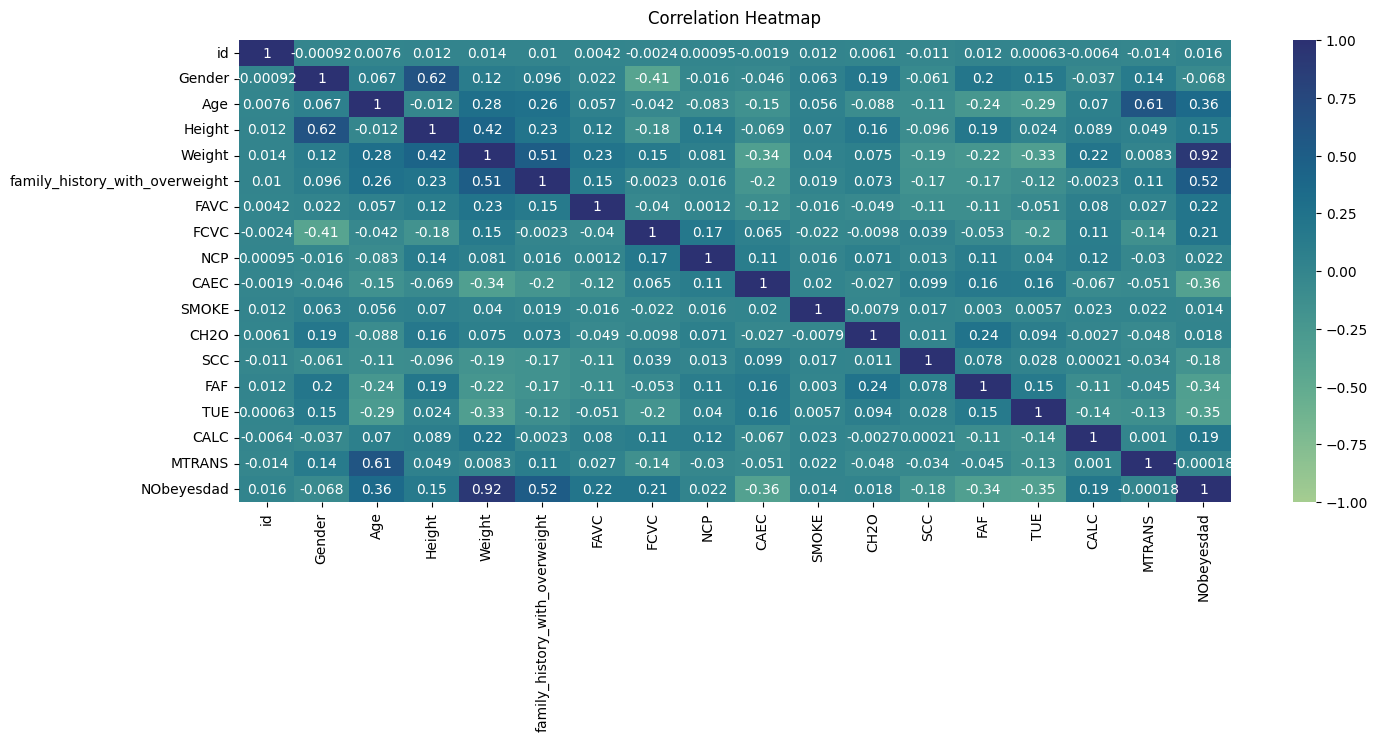

In [24]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap="crest")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

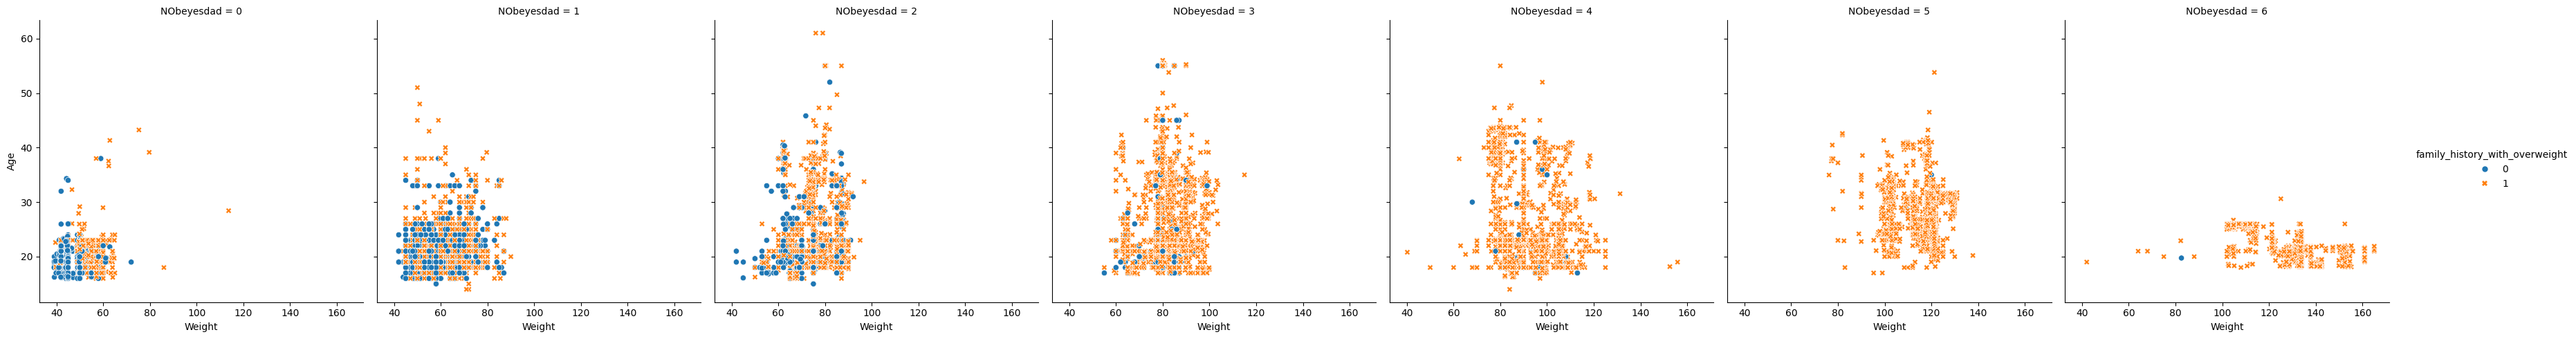

In [11]:
sns.relplot(data= df, x='Weight', y='Age', col="NObeyesdad", hue='family_history_with_overweight', style='family_history_with_overweight', kind='scatter')

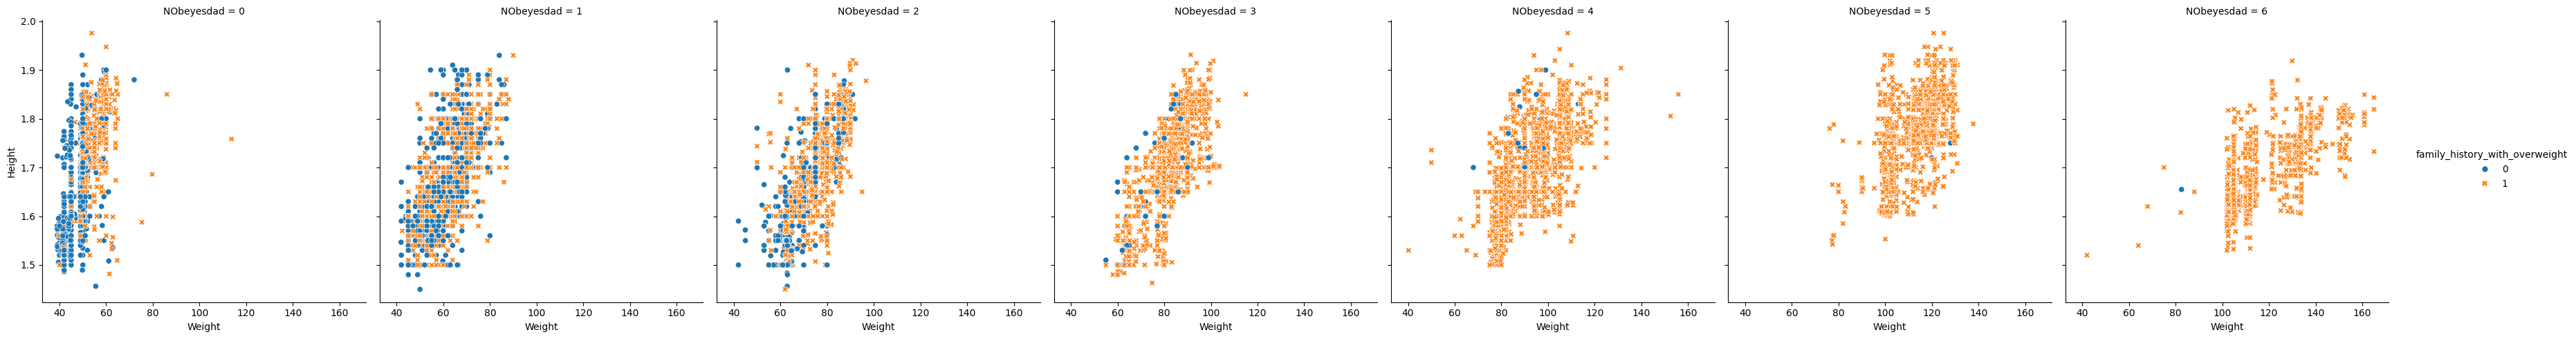

In [12]:
sns.relplot(data= df, x='Weight', y='Height', col="NObeyesdad", hue='family_history_with_overweight', style='family_history_with_overweight', kind='scatter')

In [25]:
from mpl_toolkits.mplot3d import Axes3D

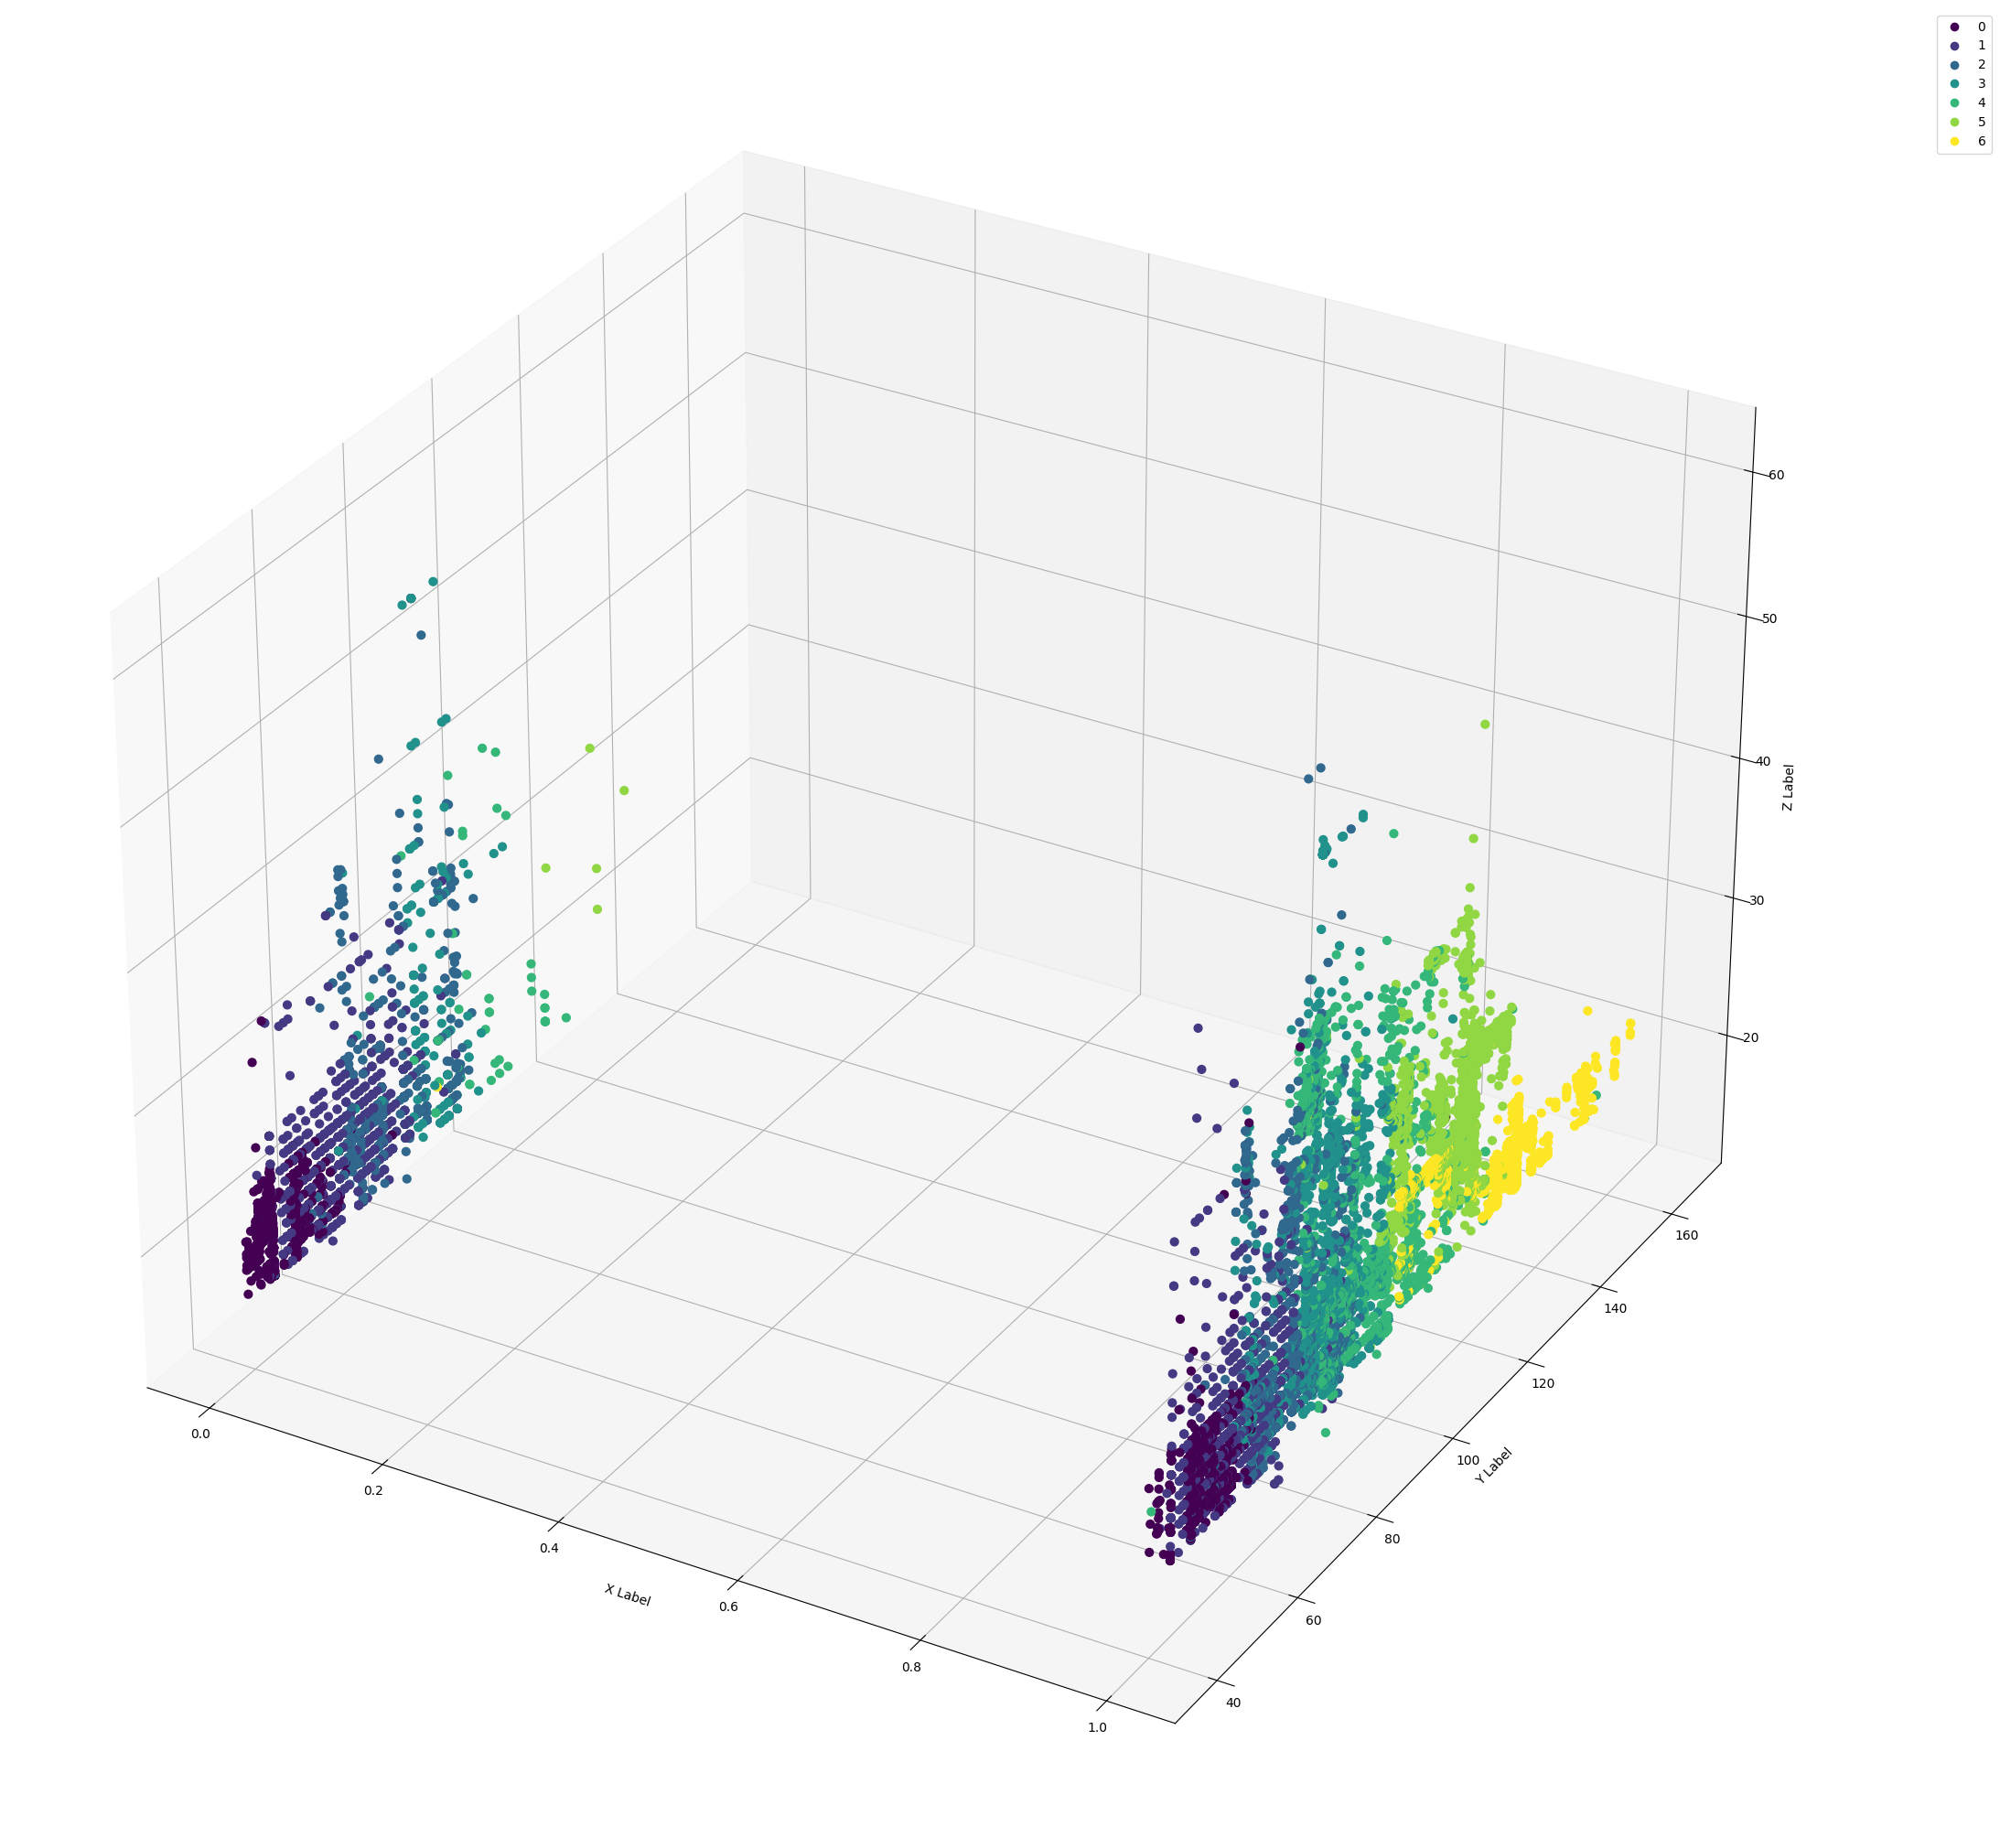

In [26]:
fig = plt.figure(figsize=(20,20))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)
sc = ax.scatter(df['family_history_with_overweight'], df['Weight'], df['Age'], s=40, c=df['NObeyesdad'], marker='o', alpha=1)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

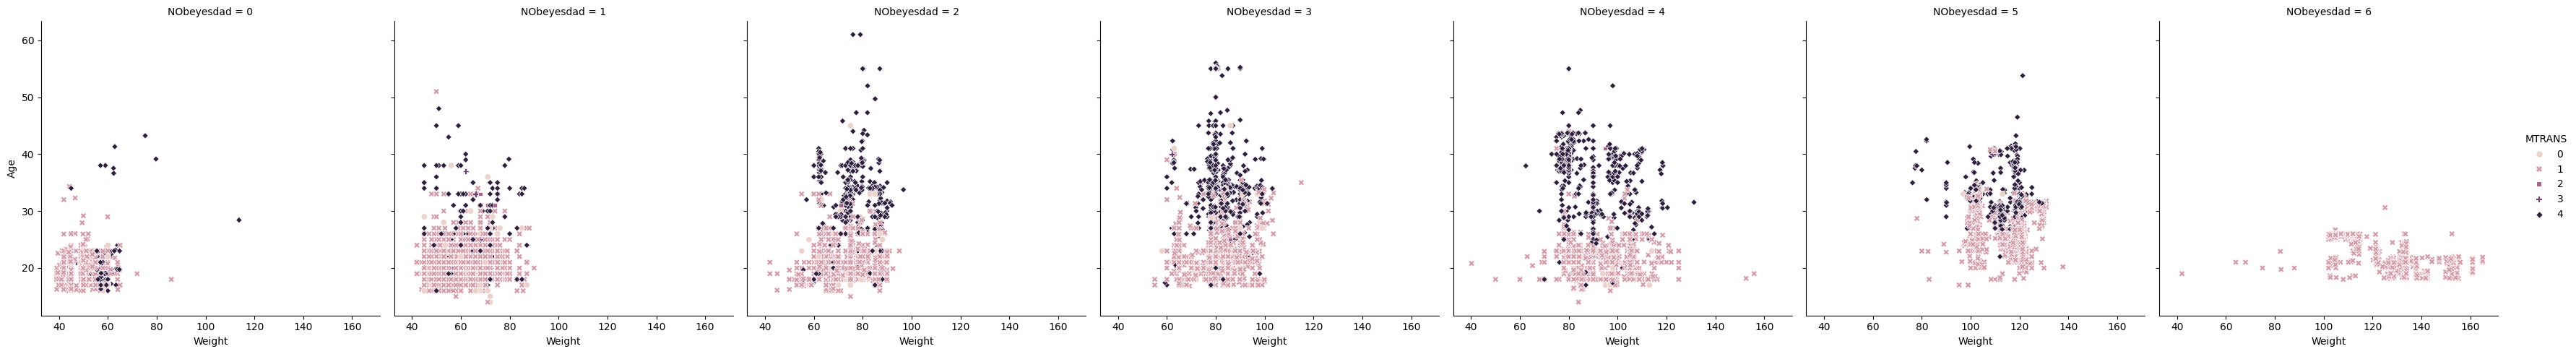

In [121]:
sns.relplot(data= df, x='Weight', y='Age', col="NObeyesdad", hue='MTRANS', style='MTRANS', kind='scatter')

In [49]:
#df.drop(columns=['FAVC, '])

In [27]:
df.columns

Index(['id', 'Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [28]:
behavior = df[[ 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'NObeyesdad']]
behavior

FAVC  FCVC  NCP  CAEC  SMOKE  CH2O  SCC  FAF  TUE  CALC  NObeyesdad
0         1     2    2     1      0     2    0    0    0     1           3
1         1     2    3     2      0     2    0    1    1     0           1
2         1     1    1     1      0     1    0    0    1     0           0
3         1     3    3     1      0     1    0    1    0     1           6
4         1     2    1     1      0     1    0    1    0     1           3
...     ...   ...  ...   ...    ...   ...  ...  ...  ...   ...         ...
20753     1     2    3     1      0     2    0    1    0     1           5
20754     1     3    4     2      0     1    0    2    1     1           0
20755     1     2    3     1      0     2    0    1    1     0           5
20756     1     2    1     1      0     2    0    0    0     0           3
20757     1     3    3     1      0     2    0    0    0     1           5

[20758 rows x 11 columns]

Text(0.5, 1.0, 'Correlation Heatmap')

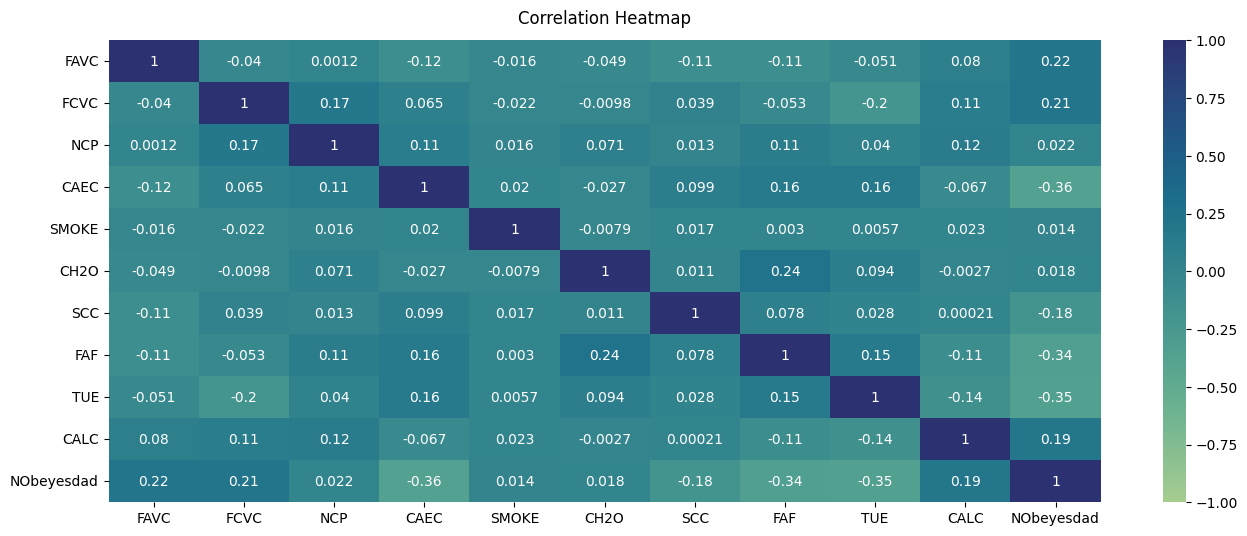

In [29]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(behavior.corr(), vmin=-1, vmax=1, annot=True, cmap="crest")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [30]:
behavior['lifestyle'] = df['id']
behavior

C:\Users\ianjo\AppData\Local\Temp\ipykernel_18848\1963860911.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  behavior['lifestyle'] = df['id']


FAVC  FCVC  NCP  CAEC  SMOKE  CH2O  SCC  FAF  TUE  CALC  NObeyesdad  \
0         1     2    2     1      0     2    0    0    0     1           3   
1         1     2    3     2      0     2    0    1    1     0           1   
2         1     1    1     1      0     1    0    0    1     0           0   
3         1     3    3     1      0     1    0    1    0     1           6   
4         1     2    1     1      0     1    0    1    0     1           3   
...     ...   ...  ...   ...    ...   ...  ...  ...  ...   ...         ...   
20753     1     2    3     1      0     2    0    1    0     1           5   
20754     1     3    4     2      0     1    0    2    1     1           0   
20755     1     2    3     1      0     2    0    1    1     0           5   
20756     1     2    1     1      0     2    0    0    0     0           3   
20757     1     3    3     1      0     2    0    0    0     1           5   

       lifestyle  
0              0  
1              1  
2              2  
3              3  
4              4  
...          ...  
20753      20753  
20754      20754  
20755      20755  
20756      20756  
20757      20757  

[20758 rows x 12 columns]

In [31]:
for i, row in df.iterrows():
    behavior.loc[i, 'lifestyle'] = (2 * (-row['CAEC'] - row['FAF'] - row['TUE'] - row['SCC'])) + (row['CALC'] + row['FCVC'] + row['FAVC'] + row['CH2O'])

behavior

FAVC  FCVC  NCP  CAEC  SMOKE  CH2O  SCC  FAF  TUE  CALC  NObeyesdad  \
0         1     2    2     1      0     2    0    0    0     1           3   
1         1     2    3     2      0     2    0    1    1     0           1   
2         1     1    1     1      0     1    0    0    1     0           0   
3         1     3    3     1      0     1    0    1    0     1           6   
4         1     2    1     1      0     1    0    1    0     1           3   
...     ...   ...  ...   ...    ...   ...  ...  ...  ...   ...         ...   
20753     1     2    3     1      0     2    0    1    0     1           5   
20754     1     3    4     2      0     1    0    2    1     1           0   
20755     1     2    3     1      0     2    0    1    1     0           5   
20756     1     2    1     1      0     2    0    0    0     0           3   
20757     1     3    3     1      0     2    0    0    0     1           5   

       lifestyle  
0              4  
1             -3  
2             -1  
3              2  
4              1  
...          ...  
20753          2  
20754         -4  
20755         -1  
20756          3  
20757          5  

[20758 rows x 12 columns]

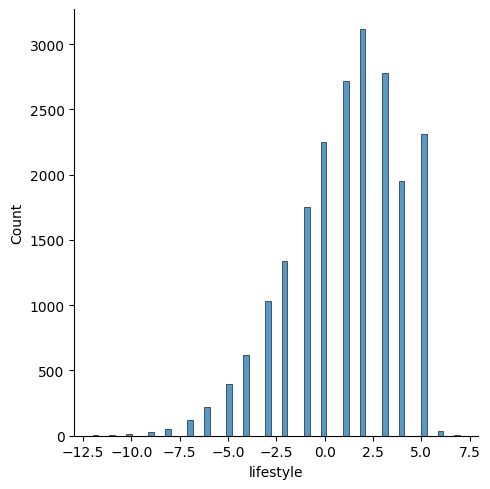

In [32]:
sns.displot(behavior['lifestyle'])

In [17]:
for i, row in behavior.iterrows():
    

SyntaxError: incomplete input (2897051972.py, line 2)

Text(0.5, 1.0, 'Correlation Heatmap')

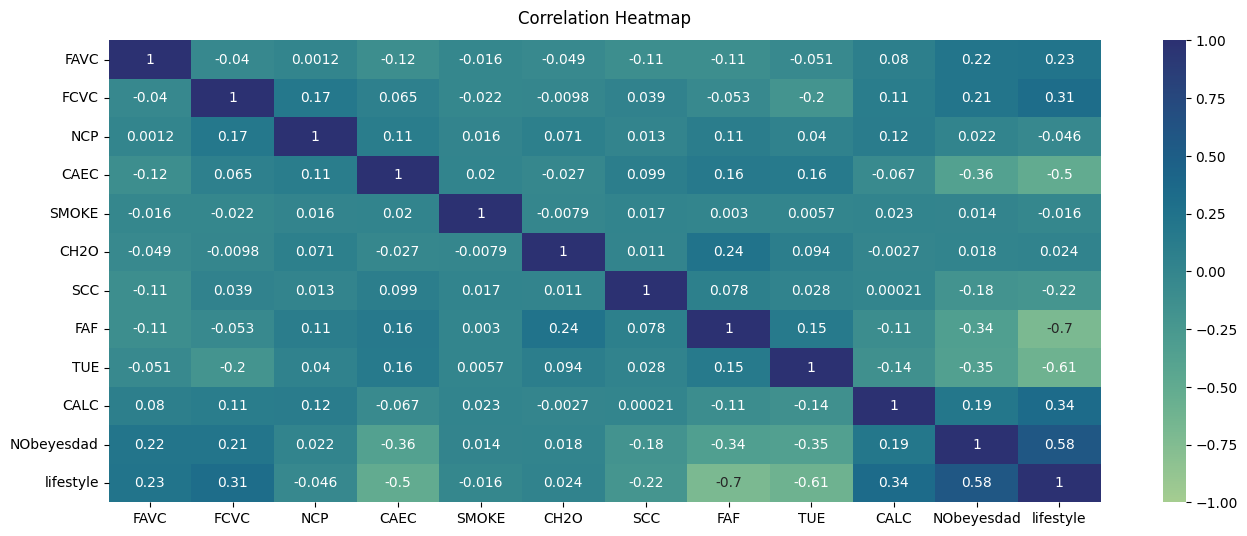

In [18]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(behavior.corr(), vmin=-1, vmax=1, annot=True, cmap="crest")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [33]:
behavior.sort_values(by=['NObeyesdad', 'lifestyle']).to_csv('./sorted.csv')

In [34]:
df['lifestyle'] = behavior['lifestyle']
df

id  Gender        Age    Height      Weight  \
0          0       1  24.443011  1.699998   81.669950   
1          1       0  18.000000  1.560000   57.000000   
2          2       0  18.000000  1.711460   50.165754   
3          3       0  20.952737  1.710730  131.274851   
4          4       1  31.641081  1.914186   93.798055   
...      ...     ...        ...       ...         ...   
20753  20753       1  25.137087  1.766626  114.187096   
20754  20754       1  18.000000  1.710000   50.000000   
20755  20755       1  20.101026  1.819557  105.580491   
20756  20756       1  33.852953  1.700000   83.520113   
20757  20757       1  26.680376  1.816547  118.134898   

       family_history_with_overweight  FAVC  FCVC  NCP  CAEC  SMOKE  CH2O  \
0                                   1     1     2    2     1      0     2   
1                                   1     1     2    3     2      0     2   
2                                   1     1     1    1     1      0     1   
3                                   1     1     3    3     1      0     1   
4                                   1     1     2    1     1      0     1   
...                               ...   ...   ...  ...   ...    ...   ...   
20753                               1     1     2    3     1      0     2   
20754                               0     1     3    4     2      0     1   
20755                               1     1     2    3     1      0     2   
20756                               1     1     2    1     1      0     2   
20757                               1     1     3    3     1      0     2   

       SCC  FAF  TUE  CALC  MTRANS  NObeyesdad  lifestyle  
0        0    0    0     1       1           3          4  
1        0    1    1     0       4           1         -3  
2        0    0    1     0       1           0         -1  
3        0    1    0     1       1           6          2  
4        0    1    0     1       1           3          1  
...    ...  ...  ...   ...     ...         ...        ...  
20753    0    1    0     1       1           5          2  
20754    0    2    1     1       1           0         -4  
20755    0    1    1     0       1           5         -1  
20756    0    0    0     0       4           3          3  
20757    0    0    0     1       1           5          5  

[20758 rows x 19 columns]

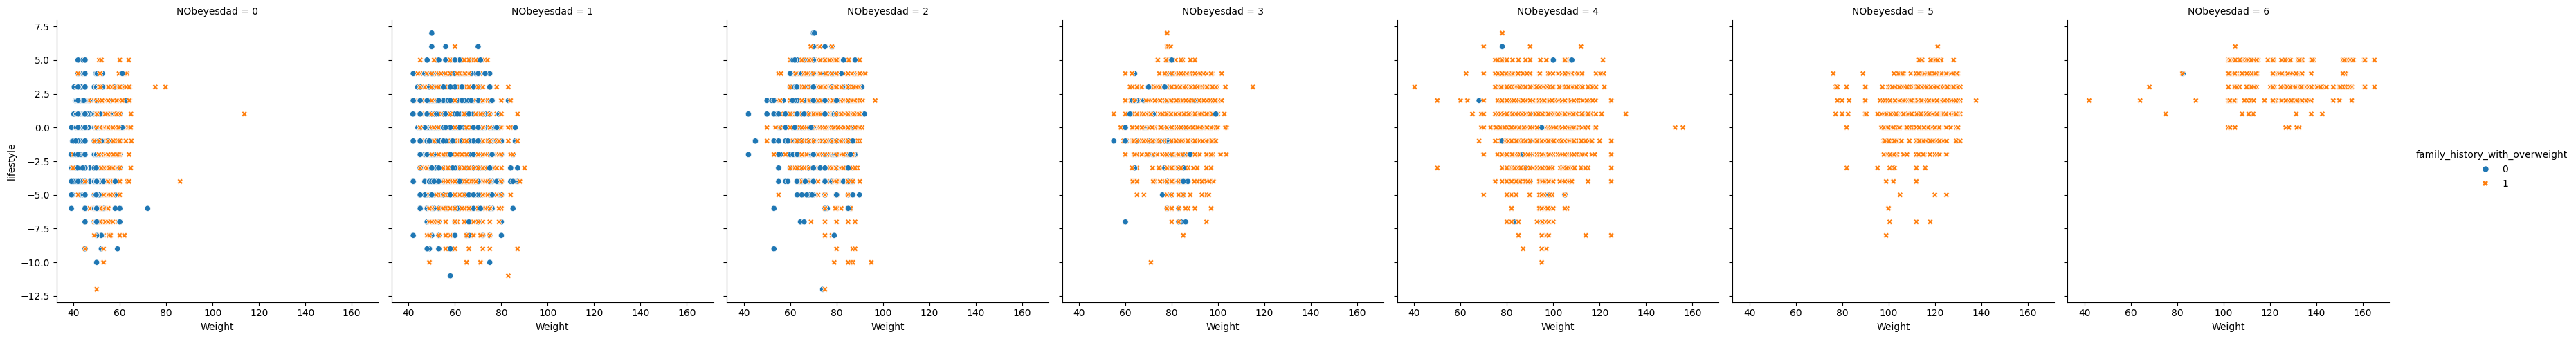

In [35]:
sns.relplot(data= df, y='lifestyle', x='Weight', col="NObeyesdad", hue='family_history_with_overweight', style='family_history_with_overweight', kind='scatter')

Text(0.5, 1.0, 'Correlation Heatmap')

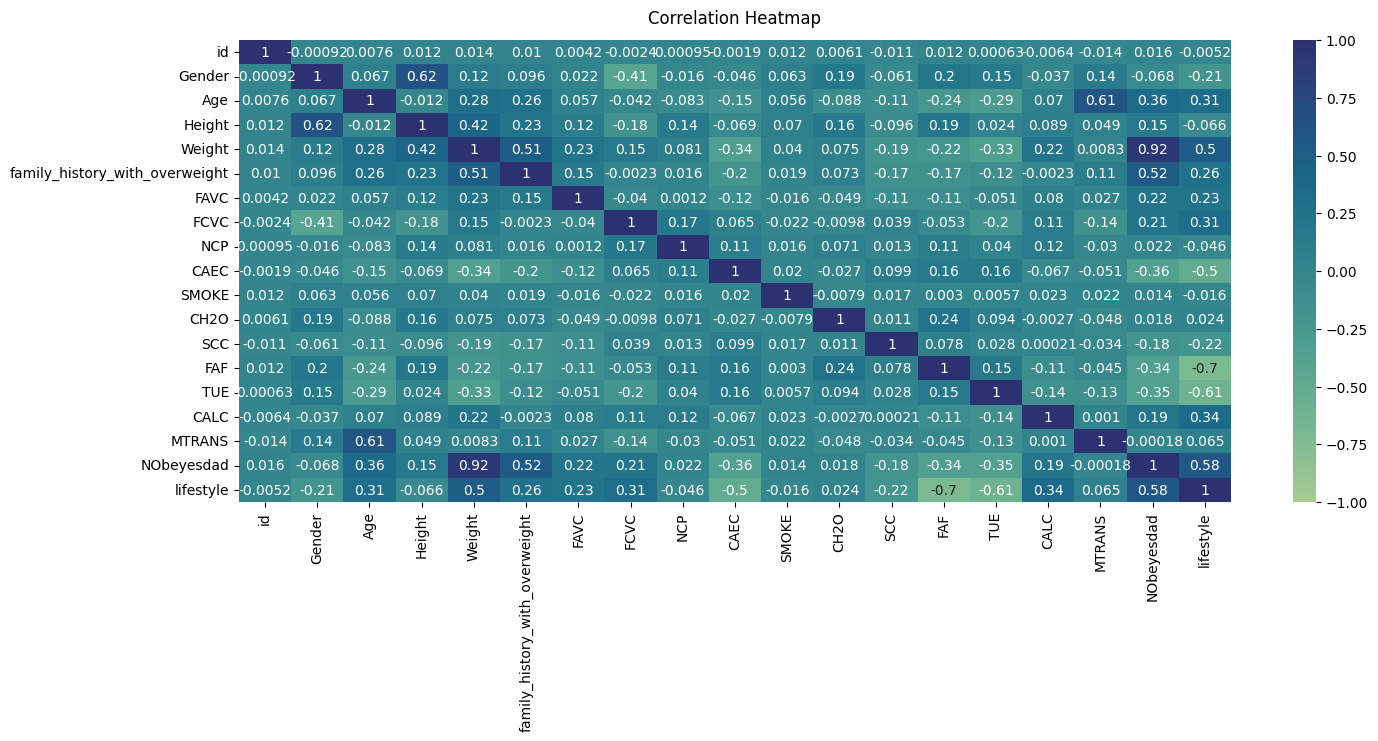

In [22]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap="crest")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [36]:
df = df[['Height', 'Age', 'Weight', 'family_history_with_overweight', 'FAVC', 'FCVC', 'CAEC', 'lifestyle', 'NObeyesdad']]
df

Height        Age      Weight  family_history_with_overweight  FAVC  \
0      1.699998  24.443011   81.669950                               1     1   
1      1.560000  18.000000   57.000000                               1     1   
2      1.711460  18.000000   50.165754                               1     1   
3      1.710730  20.952737  131.274851                               1     1   
4      1.914186  31.641081   93.798055                               1     1   
...         ...        ...         ...                             ...   ...   
20753  1.766626  25.137087  114.187096                               1     1   
20754  1.710000  18.000000   50.000000                               0     1   
20755  1.819557  20.101026  105.580491                               1     1   
20756  1.700000  33.852953   83.520113                               1     1   
20757  1.816547  26.680376  118.134898                               1     1   

       FCVC  CAEC  lifestyle  NObeyesdad  
0         2     1          4           3  
1         2     2         -3           1  
2         1     1         -1           0  
3         3     1          2           6  
4         2     1          1           3  
...     ...   ...        ...         ...  
20753     2     1          2           5  
20754     3     2         -4           0  
20755     2     1         -1           5  
20756     2     1          3           3  
20757     3     1          5           5  

[20758 rows x 9 columns]

Text(0.5, 1.0, 'Correlation Heatmap')

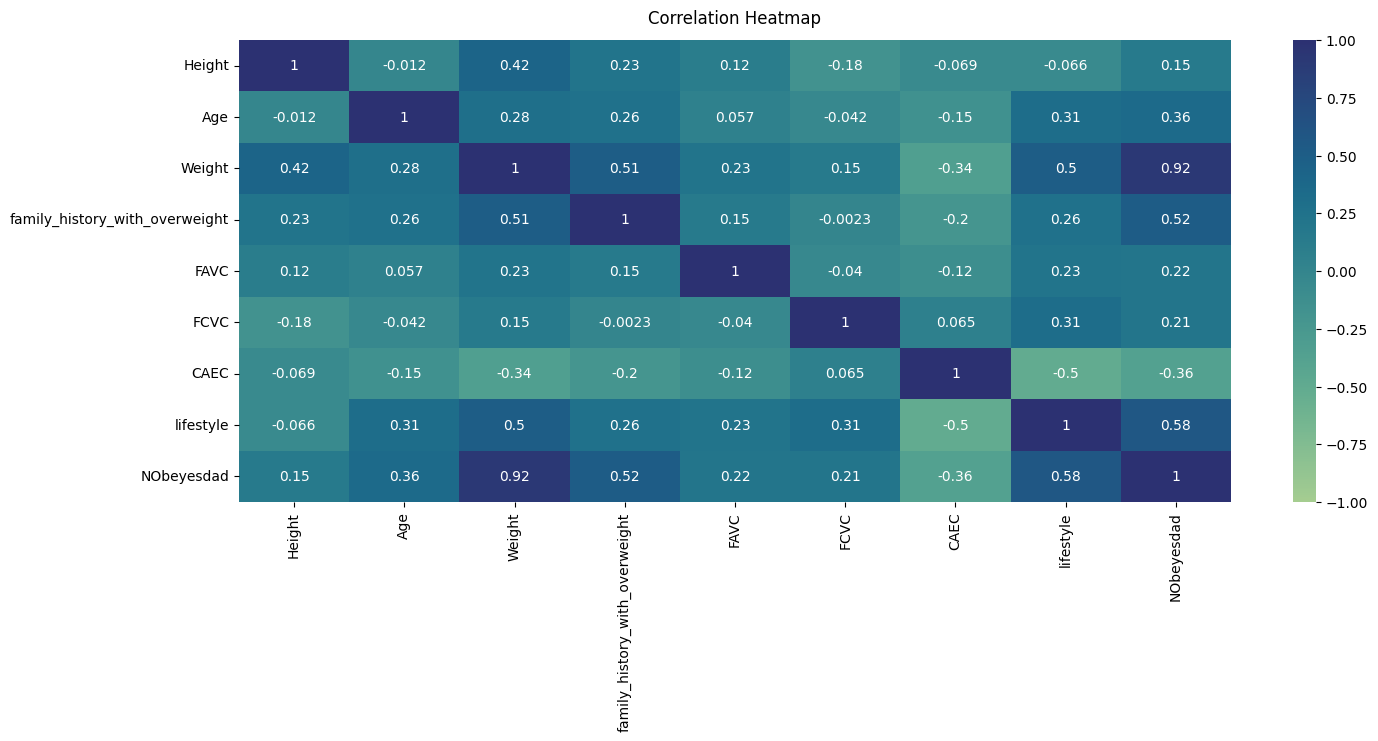

In [37]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap="crest")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [28]:
df.to_csv('./clean.csv')

In [38]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [39]:
X = df.drop("NObeyesdad", axis=1) 
y = df['NObeyesdad']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [32]:
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=0)

In [46]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=0)
model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [47]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8871226718047527

In [48]:
target_names = ['6', '5', '1', '4', '0', '3', '2']
metrics = classification_report(y_test, y_pred, target_names=target_names)
print(metrics)

              precision    recall  f1-score   support

           6       0.92      0.93      0.92       733
           5       0.85      0.86      0.85       939
           1       0.78      0.72      0.75       704
           4       0.77      0.82      0.80       781
           0       0.88      0.85      0.87       873
           3       0.96      0.95      0.95      1002
           2       0.99      0.99      0.99      1196

    accuracy                           0.89      6228
   macro avg       0.88      0.88      0.88      6228
weighted avg       0.89      0.89      0.89      6228



In [51]:
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import SGDClassifier

In [52]:
base_clf = SGDClassifier(loss="log_loss", random_state=0)
model = BaggingClassifier(base_estimator=base_clf, n_estimators=100, random_state=0)
model.fit(X_train, y_train)

c:\Users\ianjo\miniconda2\envs\py311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=SGDClassifier(loss='log_loss', random_state=0),
                  n_estimators=100, random_state=0)

In [53]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.6335902376364804

In [55]:
target_names = ['6', '5', '1', '4', '0', '3', '2']
metrics = classification_report(y_test, y_pred, target_names=target_names)
print(metrics)

              precision    recall  f1-score   support

           6       0.81      0.81      0.81       733
           5       0.58      0.38      0.46       939
           1       0.33      0.60      0.42       704
           4       0.33      0.17      0.23       781
           0       0.41      0.47      0.44       873
           3       0.91      0.85      0.88      1002
           2       0.94      0.99      0.96      1196

    accuracy                           0.63      6228
   macro avg       0.62      0.61      0.60      6228
weighted avg       0.65      0.63      0.63      6228



In [15]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.001, random_state=0)
model.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [59]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8871226718047527

In [60]:
target_names = ['6', '5', '1', '4', '0', '3', '2']
metrics = classification_report(y_test, y_pred, target_names=target_names)
print(metrics)

              precision    recall  f1-score   support

           6       0.92      0.93      0.92       733
           5       0.85      0.86      0.85       939
           1       0.78      0.72      0.75       704
           4       0.77      0.82      0.80       781
           0       0.88      0.85      0.87       873
           3       0.96      0.95      0.95      1002
           2       0.99      0.99      0.99      1196

    accuracy                           0.89      6228
   macro avg       0.88      0.88      0.88      6228
weighted avg       0.89      0.89      0.89      6228



In [111]:
test = pd.read_csv('./test.csv')
test['FCVC'] = test['FCVC'].astype(int)
test['NCP'] = test['NCP'].astype(int)
test['CH2O'] = test['CH2O'].astype(int)
test['FAF'] = test['FAF'].astype(int)
test['TUE'] = test['TUE'].astype(int)

gen = test['Gender'].map({'Male':1, 'Female':0})
fam = test['family_history_with_overweight'].map({'yes':1, 'no':0})
fav = test['FAVC'].map({'yes':1, 'no':0})
smk = test['SMOKE'].map({'yes':1, 'no':0})
scc = test['SCC'].map({'yes':1, 'no':0})
caec = test['CAEC'].map({'Sometimes':1, 'Frequently':2, 'Always':3, 'no':0})
calc = test['CALC'].map({'Sometimes':1, 'Frequently':2, 'no':0})
mtrans = test['MTRANS'].map({'Public_Transportation':1, 'Automobile':4, 'Walking':0, 'Motorbike':3, 'Bike':2})

test['Gender'] = gen 
test['family_history_with_overweight'] = fam
test['FAVC'] = fav
test['SMOKE'] = smk
test['SCC'] = scc
test['CAEC'] = caec
test['CALC'] = calc
test['MTRANS'] = mtrans

test['lifestyle'] = test['id']
test.fillna(1, inplace=True)

for i, row in test.iterrows():
    test.loc[i, 'lifestyle'] = (2 * (-row['CAEC'] - row['FAF'] - row['TUE'] - row['SCC'])) + (row['CALC'] + row['FCVC'] + row['FAVC'] + row['CH2O'])

test 

id  Gender        Age    Height      Weight  \
0      20758       1  26.899886  1.848294  120.644178   
1      20759       0  21.000000  1.600000   66.000000   
2      20760       0  26.000000  1.643355  111.600553   
3      20761       1  20.979254  1.553127  103.669116   
4      20762       0  26.000000  1.627396  104.835346   
...      ...     ...        ...       ...         ...   
13835  34593       1  23.327836  1.721384   78.030383   
13836  34594       0  29.000000  1.590000   62.000000   
13837  34595       0  22.935612  1.585547   44.376637   
13838  34596       1  21.000000  1.620000   53.000000   
13839  34597       1  26.490926  1.812259  120.980508   

       family_history_with_overweight  FAVC  FCVC  NCP  CAEC  SMOKE  CH2O  \
0                                   1     1     2    3     1      0     2   
1                                   1     1     2    1     1      0     3   
2                                   1     1     3    3     1      0     2   
3                                   1     1     2    2     1      0     2   
4                                   1     1     3    3     1      0     2   
...                               ...   ...   ...  ...   ...    ...   ...   
13835                               1     0     2    3     1      0     1   
13836                               0     1     3    3     1      0     2   
13837                               0     1     3    2     2      0     2   
13838                               1     1     2    3     1      0     2   
13839                               1     1     2    3     1      0     2   

       SCC  FAF  TUE  CALC  MTRANS  lifestyle  
0        0    0    0   1.0       1          4  
1        0    1    0   1.0       1          3  
2        0    0    0   1.0       1          5  
3        0    0    0   1.0       1          4  
4        0    0    0   1.0       1          5  
...    ...  ...  ...   ...     ...        ...  
13835    0    0    0   1.0       1          2  
13836    0    0    0   1.0       1          5  
13837    0    1    1   1.0       1         -1  
13838    0    3    2   0.0       1         -7  
13839    0    1    0   1.0       1          2  

[13840 rows x 18 columns]

Text(0.5, 1.0, 'Correlation Heatmap')

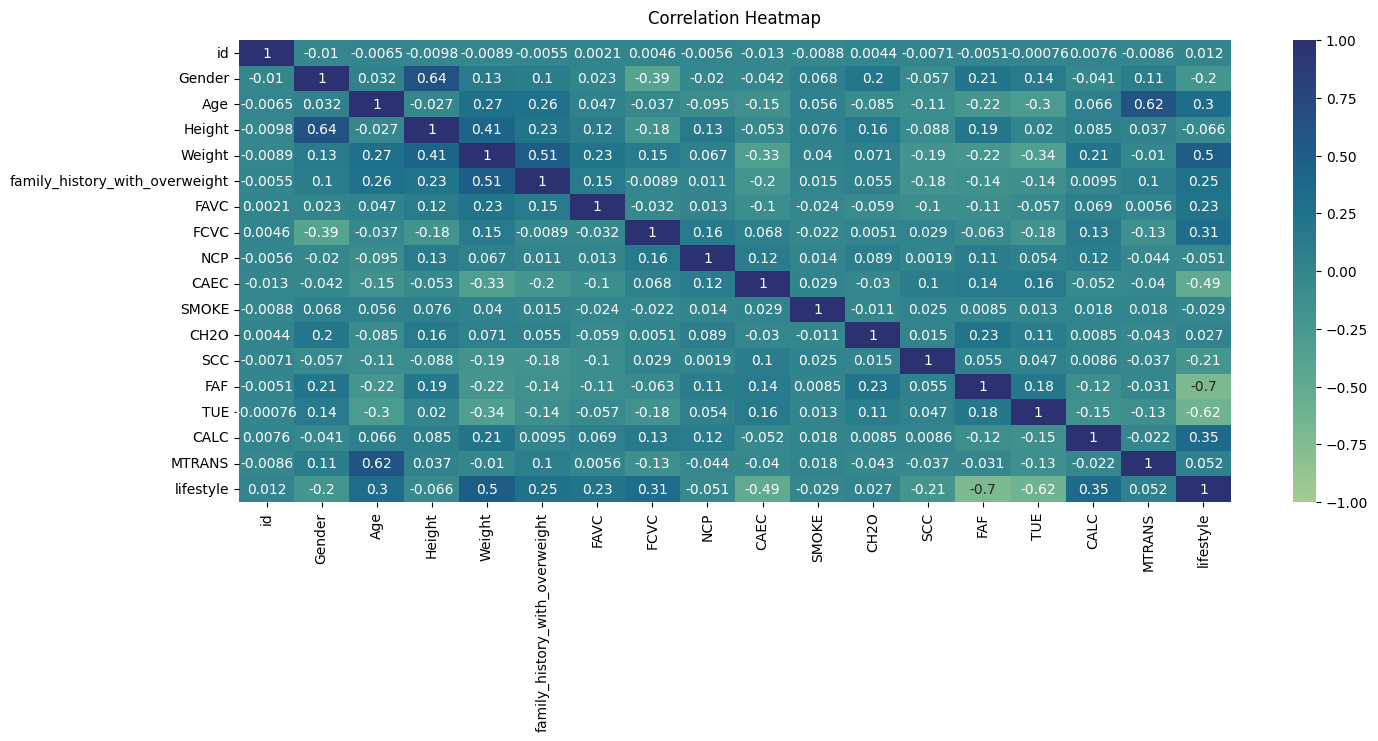

In [106]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(test.corr(), vmin=-1, vmax=1, annot=True, cmap="crest")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [107]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=0)
model.fit(X, y)

GradientBoostingClassifier(random_state=0)

In [112]:
id = test['id']
test = test[['Height', 'Age', 'Weight', 'family_history_with_overweight', 'FAVC', 'FCVC', 'CAEC', 'lifestyle']]
y_pred = model.predict(test)
y_pred

array([5, 2, 6, ..., 0, 1, 5], dtype=int64)

In [115]:
test['NObeyesdad'] = y_pred
test['id'] = id
test

C:\Users\ianjo\AppData\Local\Temp\ipykernel_2300\3661976969.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['NObeyesdad'] = y_pred
C:\Users\ianjo\AppData\Local\Temp\ipykernel_2300\3661976969.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['id'] = id


Height        Age      Weight  family_history_with_overweight  FAVC  \
0      1.848294  26.899886  120.644178                               1     1   
1      1.600000  21.000000   66.000000                               1     1   
2      1.643355  26.000000  111.600553                               1     1   
3      1.553127  20.979254  103.669116                               1     1   
4      1.627396  26.000000  104.835346                               1     1   
...         ...        ...         ...                             ...   ...   
13835  1.721384  23.327836   78.030383                               1     0   
13836  1.590000  29.000000   62.000000                               0     1   
13837  1.585547  22.935612   44.376637                               0     1   
13838  1.620000  21.000000   53.000000                               1     1   
13839  1.812259  26.490926  120.980508                               1     1   

       FCVC  CAEC  lifestyle  NObeyesdad     id  
0         2     1          4           5  20758  
1         2     1          3           2  20759  
2         3     1          5           6  20760  
3         2     1          4           4  20761  
4         3     1          5           6  20762  
...     ...   ...        ...         ...    ...  
13835     2     1          2           3  34593  
13836     3     1          5           2  34594  
13837     3     2         -1           0  34595  
13838     2     1         -7           1  34596  
13839     2     1          2           5  34597  

[13840 rows x 10 columns]

Text(0.5, 1.0, 'Correlation Heatmap')

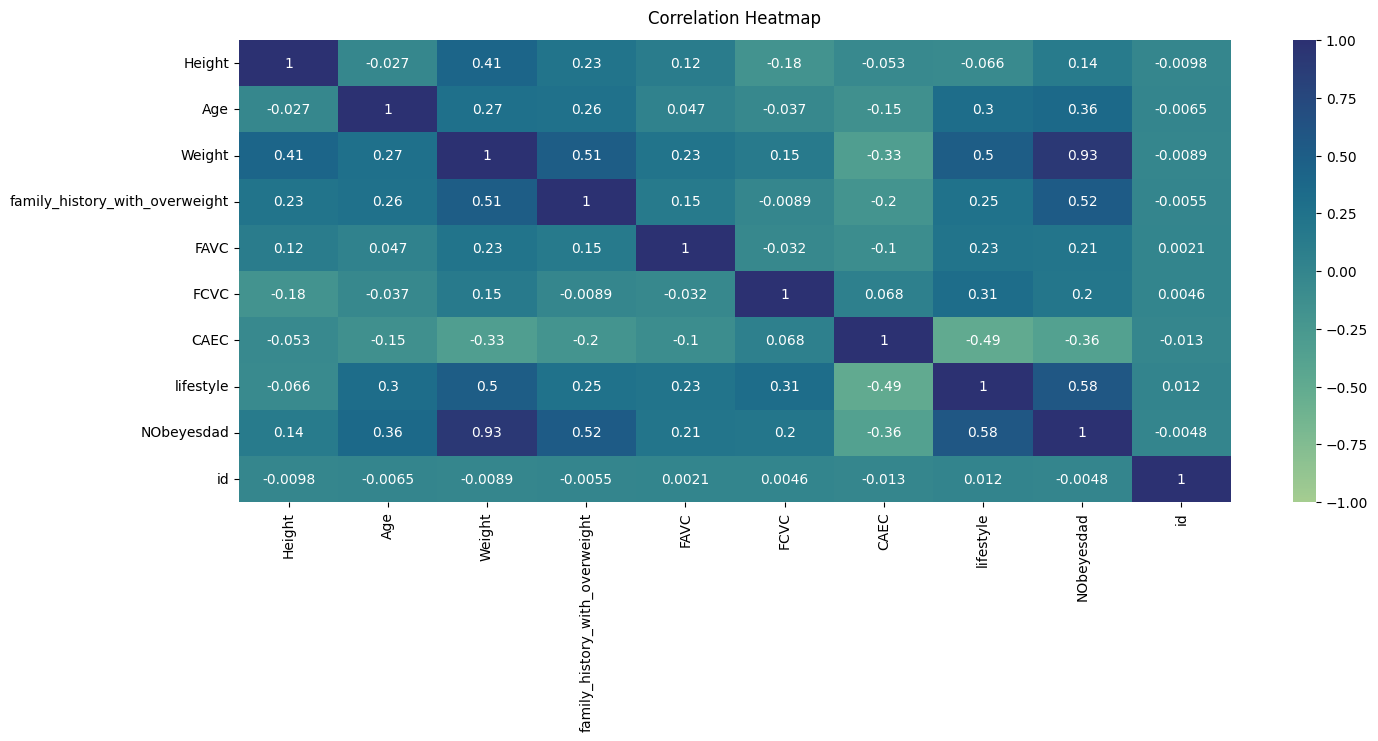

In [116]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(test.corr(), vmin=-1, vmax=1, annot=True, cmap="crest")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [120]:
classes = ['Obesity_Type_III', 'Obesity_Type_II', 'Normal_Weight',
       'Obesity_Type_I', 'Insufficient_Weight', 'Overweight_Level_II',
       'Overweight_Level_I']
nums = [6, 5, 1, 4, 0, 3, 2]
tuples = [(key, value)
          for i, (key, value) in enumerate(zip(nums, classes))]
ranks = dict(tuples)
tmp = test['NObeyesdad'].map(ranks)
test['NObeyesdad'] = tmp

In [136]:
test = test[['id', 'NObeyesdad']]
test.to_csv('./submission.csv', index=False)
test

id           NObeyesdad
0      20758      Obesity_Type_II
1      20759   Overweight_Level_I
2      20760     Obesity_Type_III
3      20761       Obesity_Type_I
4      20762     Obesity_Type_III
...      ...                  ...
13835  34593  Overweight_Level_II
13836  34594   Overweight_Level_I
13837  34595  Insufficient_Weight
13838  34596        Normal_Weight
13839  34597      Obesity_Type_II

[13840 rows x 2 columns]